# PCA Pippo
### Obtención de los datos y librerías necesarias


Reducción de la dimensionalidad
Análisis de Componentes Principales (PCA)
PCA es una técnica de aprendizaje no supervisado que tiene como objetivo fundamental la reducción de dimensiones. 

Armamos este PCA para explorar mas los datos, visualizar las correlaciones que hay entre columnas y de hecho en varios pasajes del modelo, fuimos achicando la cantidad, quedandonos con 5 y viendo que son suficientes, tambien ver como se diferencian las lineas y typos de productos.

Visualizamos los resultados y vimos que con 2 compenentes, a lo sumo 3 explicabamos bien.

Arrancamos con un dataset reducido realizando un groupby con promedios, lo bueno de este es que nos dio el puntapie para entender mejor los datos y que la visualizacion es simple, luego continuamos el ejercicio con la base completa

In [1]:
#Importamos las librerías que usaremos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats as sts
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.io import output_notebook, show

import datetime

In [2]:
# Importamos los dataset
df = pd.read_csv('Pippo_tot_ana.csv',parse_dates=['OrderDate'])

## Analisis por Linea de Producto

In [3]:
# Vamos a usar el promedio de los valores por estados para una primera aproximacion y luego el total de los datos
# Por previos chequeos, excluimos del analisis otras variables que estaban intimamente relacionadas
df_tabla = df.groupby('ProductLine')['Quantity', 'Price', 'TotalDiscountPrice', 'ShippingCost', 'Value'].mean()

In [4]:
df_tabla.index_col = 'ProductLine'
df_tabla

,Quantity,Price,TotalDiscountPrice,ShippingCost,Value
ProductLine,,,,,
Accesorios,1.404286,762.181523,-1527.644990,27.368179,2092.738312
Aire Libre,1.137464,1273.790900,-2083.550407,23.909487,2045.832846
Baño,1.220484,651.709523,-1384.892403,32.825230,2037.929427
Cocina,1.309779,409.223045,-1251.243464,27.861148,1911.289045
Decoración,1.293340,1171.879530,-1539.766069,32.445618,2194.151086
Dormitorio,1.084320,1933.547828,-2125.020664,36.444577,2656.978363
Organizadores,1.265043,893.921762,-1361.479437,27.590418,2121.990445
Ropa,1.064997,944.287424,-1405.905113,27.350396,1993.634115


In [5]:
df_tabla.dropna( inplace=True )

In [6]:
# Estoy trabajando con los ProductLine promedio
df_tabla.shape

(8, 5)

Necesitamos variables con media 0 y varianza 1:

In [7]:
# Observamos la media de las variables

print("Media de las variables: ")
print(df_tabla.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df_tabla.var(axis=0))

Media de las variables: 
Quantity                 1.222464
Price                 1005.067692
TotalDiscountPrice   -1584.937818
ShippingCost            29.474382
Value                 2131.817955
dtype: float64


Varianza de las variables: 
Quantity                   0.014090
Price                 216721.128972
TotalDiscountPrice    111283.342434
ShippingCost              16.386765
Value                  52176.991501
dtype: float64


In [8]:
# Normalizamos los datos utilizando el objeto StdSclr:

from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()

df_linea_std = pd.DataFrame(StdSclr.fit_transform(df_tabla), index=df_tabla.index, columns=df_tabla.columns)
df_linea_std.head()

,Quantity,Price,TotalDiscountPrice,ShippingCost,Value
ProductLine,,,,,
Accesorios,1.637537,-0.557761,0.183604,-0.556224,-0.182897
Aire Libre,-0.765535,0.617093,-1.597880,-1.469624,-0.402420
Baño,-0.017835,-0.811448,0.641076,0.884920,-0.439409
Cocina,0.786382,-1.368291,1.069374,-0.426036,-1.032100
Decoración,0.638327,0.383065,0.144760,0.784669,0.291726


In [9]:
# Observamos nuevamente la media de las variables:
print("Media de las variables: ")
print(df_linea_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(df_linea_std.var(axis=0))

Media de las variables: 
Quantity             -2.498002e-16
Price                -4.510281e-17
TotalDiscountPrice   -1.804112e-16
ShippingCost          0.000000e+00
Value                 1.096345e-15
dtype: float64


Varianza de las variables: 
Quantity              1.142857
Price                 1.142857
TotalDiscountPrice    1.142857
ShippingCost          1.142857
Value                 1.142857
dtype: float64


In [10]:
from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Instanciamos la clase PCA:
pca_linea = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_linea.fit(df_linea_std)
pca_linea

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# Imprimo los componentes principales
print(pca_linea.components_)

[[-0.34792381  0.53823517 -0.46326108  0.33697936  0.51096576]
 [-0.49996435  0.11015729 -0.35937778 -0.71593447 -0.31013943]
 [-0.77527199 -0.16203718  0.46580478  0.35621195 -0.1698124 ]
 [-0.01000369  0.38674557  0.643154   -0.46131649  0.47314672]
 [ 0.16684707  0.722731    0.16004879  0.18488614 -0.62451858]]


In [12]:
# Quiero quedarme sólo con los primeras 2 componenetes principales, ya que estan explican mas del 90% en el ejemplo:
pca_linea_2 = PCA(n_components= 2)

# Calculamos los componentes principales con el método fit()
pca_linea_2.fit(df_linea_std)

print(pca_linea_2.components_)

[[-0.34792381  0.53823517 -0.46326108  0.33697936  0.51096576]
 [-0.49996435  0.11015729 -0.35937778 -0.71593447 -0.31013943]]


In [13]:
# Generamos un DataFrame expresando en términos de nuestros componentes principales:

df_linea_pca = pd.DataFrame(pca_linea.fit_transform(df_linea_std), \
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_linea_std.index)
df_linea_pca

,PC1,PC2,PC3,PC4,PC5
ProductLine,,,,,
Accesorios,-1.235891,-0.491191,-1.260710,0.056050,-0.089123
Aire Libre,0.637868,2.201921,-0.705956,-0.293809,0.042132
Baño,-0.653853,-0.808125,0.833764,-0.517468,-0.048802
Cocina,-2.176396,-0.303090,0.133678,-0.141072,-0.120751
Decoración,0.330508,-0.981214,-0.259548,0.010914,0.369410
Dormitorio,4.258426,-0.601206,0.051203,0.037627,-0.138242
Organizadores,-0.793701,-0.106728,-0.091792,0.565778,-0.069135
Ropa,-0.366962,1.089634,1.299361,0.281979,0.054510


In [14]:
# Creamos un DataFRame con los loadings que vamos a usar para graficar

pca_loadings = pd.DataFrame(pca_linea.components_.T, index=df_tabla.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print(pca_linea.components_)
display(pca_loadings)

[[-0.34792381  0.53823517 -0.46326108  0.33697936  0.51096576]
 [-0.49996435  0.11015729 -0.35937778 -0.71593447 -0.31013943]
 [-0.77527199 -0.16203718  0.46580478  0.35621195 -0.1698124 ]
 [-0.01000369  0.38674557  0.643154   -0.46131649  0.47314672]
 [ 0.16684707  0.722731    0.16004879  0.18488614 -0.62451858]]


,PC1,PC2,PC3,PC4,PC5
Quantity,-0.347924,-0.499964,-0.775272,-0.010004,0.166847
Price,0.538235,0.110157,-0.162037,0.386746,0.722731
TotalDiscountPrice,-0.463261,-0.359378,0.465805,0.643154,0.160049
ShippingCost,0.336979,-0.715934,0.356212,-0.461316,0.184886
Value,0.510966,-0.310139,-0.169812,0.473147,-0.624519


## Biplot

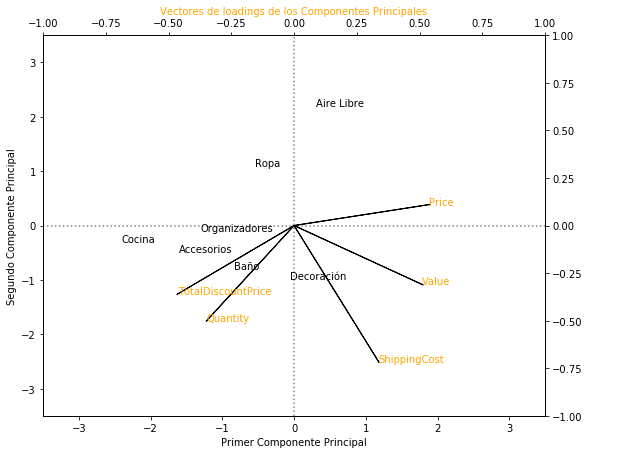

In [15]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_linea_pca.index:
    ax1.annotate(i, (df_linea_pca.PC1.loc[i], df_linea_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], pca_loadings.PC2[3])
ax2.arrow(0,0,pca_loadings.PC1[4], pca_loadings.PC2[4]);

In [16]:
# Vemos la varianza explicada de cada componente principal como atributo del modelo.

pca_linea.explained_variance_

array([3.729511  , 1.19393951, 0.65250696, 0.11118449, 0.02714375])

In [17]:
# Vemos el ratio la varianza explicada de cada componente principal como atributo del modelo.

pca_linea.explained_variance_ratio_

array([0.65266443, 0.20893941, 0.11418872, 0.01945729, 0.00475016])

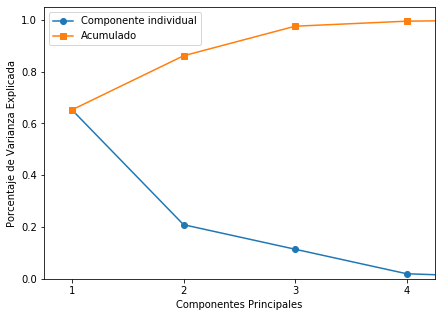

In [18]:
# Ploteamos como incrementa el % de varianza explicada a medida que agregamos componentes:

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5], pca_linea.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4,5], np.cumsum(pca_linea.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

Text(0.5, 1, 'Correlacion entre features')

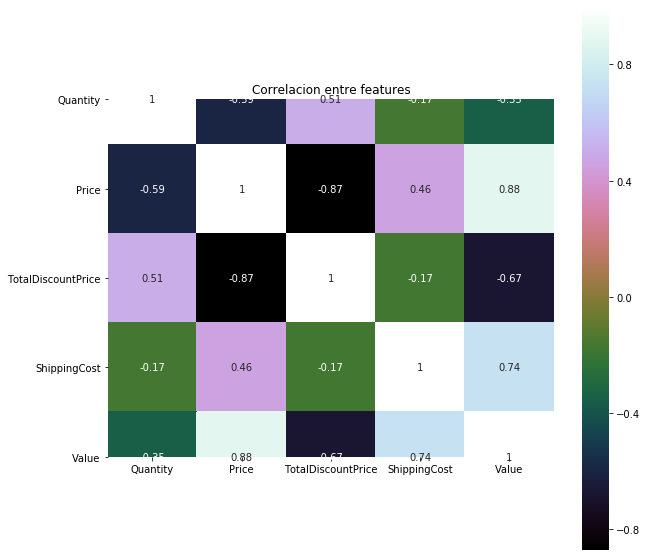

In [19]:
correlation = df_tabla.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlacion entre features')

In [20]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html
# If rowvar is True (default), then each row represents a variable, with observations in the columns. 
covarianzas = np.cov(df_linea_std, rowvar = False)
#display(covarianzas)

#otra forma de calcular la matriz de covarianzas:
mean_vec = np.mean(df_linea_std, axis=0)
cov_mat = (df_linea_std - mean_vec).T.dot((df_linea_std - mean_vec)) / (df_linea_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

In [21]:
# Descomposición en autovectores y autovalores:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.34792381 -0.49996435 -0.77527199 -0.16684707  0.01000369]
 [-0.53823517  0.11015729 -0.16203718 -0.722731   -0.38674557]
 [ 0.46326108 -0.35937778  0.46580478 -0.16004879 -0.643154  ]
 [-0.33697936 -0.71593447  0.35621195 -0.18488614  0.46131649]
 [-0.51096576 -0.31013943 -0.1698124   0.62451858 -0.47314672]]

Eigenvalues 
[3.729511   1.19393951 0.65250696 0.02714375 0.11118449]


In [22]:
# Ordeno los autovalores de mayor a menor:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#eig_pairs
# Sort the (eigenvalue, eigenvector) tuples from high to low
#ordeno por el primer elemento de cada tupla: el autovalor
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.7295110031177683
1.1939395067260992
0.6525069613553321
0.11118449406842382
0.02714374901809308


In [23]:
# Varianza explicada:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(tot)
print(var_exp)

5.714285714285717
[65.26644255456091, 20.893941367706724, 11.418871823718307, 1.9457286461974157, 0.4750156078166287]


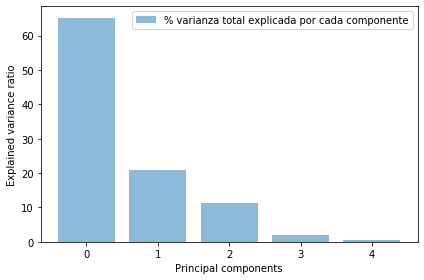

In [24]:
plt.bar(range(5), var_exp, alpha=0.5, align='center', label='% varianza total explicada por cada componente')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Me quedo con 2 componentes, en el mejor de los casos agrego al tercero

## Analisis por Tipo de Producto

In [25]:
# Vamos a usar el promedio de los valores por estados para una primera aproximacion y luego el total de los datos
# Por previos chequeos, excluimos del analisis otras variables que estaban intimamente relacionadas
df_tabla = df.groupby('ProductType')['Quantity', 'Price', 'TotalDiscountPrice', 'ShippingCost', 'Value'].mean()

In [26]:
df_tabla.index_col = 'ProductType'
df_tabla

,Quantity,Price,TotalDiscountPrice,ShippingCost,Value
ProductType,,,,,
Accesorios,1.080706,604.028341,-1286.279735,26.202806,2414.679386
Acolchados y Frazadas,1.086487,2468.184563,-2319.632877,36.712461,2923.610559
Adornos,1.097812,1593.601427,-1916.650168,32.532346,2566.537045
Alfombras,1.135627,812.068305,-1344.676373,30.418673,2215.428344
Almohadas,1.452769,890.104056,-1492.365595,26.001481,1904.888754
Almohadones,1.436616,780.569943,-1574.816078,28.223869,2127.469185
Aromatizadores,1.123072,460.398804,-1017.239931,14.388102,1594.528499
Bandejas,1.043253,858.484429,-1081.724343,25.697232,1586.137249
Bebé,1.017241,1039.510345,-1135.605138,47.272414,1758.522448


In [27]:
df_tabla.dropna( inplace=True )

In [28]:
# Estoy trabajando con los ProductLine promedio
df_tabla.shape

(27, 5)

Necesitamos variables con media 0 y varianza 1:

In [29]:
# Observamos la media de las variables

print("Media de las variables: ")
print(df_tabla.mean(axis=0))

print('\n')

# Observamos la varianza de las variables:
print("Varianza de las variables: ")
print(df_tabla.var(axis=0))

Media de las variables: 
Quantity                 1.202906
Price                  960.628603
TotalDiscountPrice   -1523.040465
ShippingCost            28.781584
Value                 2151.839649
dtype: float64


Varianza de las variables: 
Quantity                   0.043800
Price                 311019.258587
TotalDiscountPrice    187531.955054
ShippingCost              50.134718
Value                 199907.821912
dtype: float64


In [30]:
# Normalizamos los datos utilizando el objeto StdSclr:

from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()

df_linea_std = pd.DataFrame(StdSclr.fit_transform(df_tabla), index=df_tabla.index, columns=df_tabla.columns)
df_linea_std.head()

,Quantity,Price,TotalDiscountPrice,ShippingCost,Value
ProductType,,,,,
Accesorios,-0.595018,-0.651603,0.557144,-0.371142,0.599061
Acolchados y Frazadas,-0.566868,2.754704,-1.874536,1.141424,1.759012
Adornos,-0.511723,1.156609,-0.926240,0.539816,0.945174
Alfombras,-0.327598,-0.271459,0.419725,0.235612,0.144931
Almohadas,1.216633,-0.128867,0.072184,-0.400117,-0.562848


In [31]:
# Observamos nuevamente la media de las variables:
print("Media de las variables: ")
print(df_linea_std.mean(axis=0))

print('\n')

# Observamos nuevamente la varianza de las variables:
print("Varianza de las variables: ")
print(df_linea_std.var(axis=0))

Media de las variables: 
Quantity              4.255855e-16
Price                -3.762422e-16
TotalDiscountPrice   -3.042833e-16
ShippingCost         -7.812681e-16
Value                 4.358653e-16
dtype: float64


Varianza de las variables: 
Quantity              1.038462
Price                 1.038462
TotalDiscountPrice    1.038462
ShippingCost          1.038462
Value                 1.038462
dtype: float64


In [32]:
from sklearn.decomposition import PCA
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Instanciamos la clase PCA:
pca_linea = PCA()

# Al no especificar el número de componentes, PCA va a conservar todos los CP.

# Calculamos los componentes principales con el método fit()
pca_linea.fit(df_linea_std)
pca_linea

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# Imprimo los componentes principales
print(pca_linea.components_)

[[-0.17406529  0.56200375 -0.55798421  0.19807693  0.55070157]
 [-0.69488682 -0.09105012  0.26302612  0.65605458 -0.09618644]
 [ 0.69063103  0.02988755  0.01881423  0.72045037 -0.05227619]
 [ 0.05258243 -0.61255388  0.14165801  0.02756672  0.7753618 ]
 [-0.08424639 -0.54749076 -0.77398315  0.10270955 -0.28906269]]


In [34]:
# Quiero quedarme sólo con los primeras 2 componenetes principales, ya que estan explican mas del 90% en el ejemplo:
pca_linea_2 = PCA(n_components= 2)

# Calculamos los componentes principales con el método fit()
pca_linea_2.fit(df_linea_std)

print(pca_linea_2.components_)

[[-0.17406529  0.56200375 -0.55798421  0.19807693  0.55070157]
 [-0.69488682 -0.09105012  0.26302612  0.65605458 -0.09618644]]


In [35]:
# Generamos un DataFrame expresando en términos de nuestros componentes principales:

df_linea_pca = pd.DataFrame(pca_linea.fit_transform(df_linea_std), \
                            columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_linea_std.index)
df_linea_pca

,PC1,PC2,PC3,PC4,PC5
ProductType,,,,,
Accesorios,-0.317119,0.318231,-0.718637,0.901037,-0.235631
Acolchados y Frazadas,3.887568,0.229685,0.385952,-0.587419,-0.400789
Adornos,1.883353,0.269890,0.003230,-0.118870,-0.090998
Alfombras,-0.203255,0.503393,-0.064295,0.327384,-0.166334
Almohadas,-0.713690,-1.023063,0.578910,-0.294304,0.033790
Almohadones,-0.361494,-0.840174,0.718873,0.198838,0.186374
Aromatizadores,-2.220009,-0.570449,-1.699427,-0.333909,-0.233640
Bandejas,-1.347017,0.663133,-0.775335,-0.791379,-0.308998
Bebé,-0.236897,2.687022,1.361250,-0.628385,-0.175938


In [36]:
# Creamos un DataFRame con los loadings que vamos a usar para graficar

pca_loadings = pd.DataFrame(pca_linea.components_.T, index=df_tabla.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print(pca_linea.components_)
display(pca_loadings)

[[-0.17406529  0.56200375 -0.55798421  0.19807693  0.55070157]
 [-0.69488682 -0.09105012  0.26302612  0.65605458 -0.09618644]
 [ 0.69063103  0.02988755  0.01881423  0.72045037 -0.05227619]
 [ 0.05258243 -0.61255388  0.14165801  0.02756672  0.7753618 ]
 [-0.08424639 -0.54749076 -0.77398315  0.10270955 -0.28906269]]


,PC1,PC2,PC3,PC4,PC5
Quantity,-0.174065,-0.694887,0.690631,0.052582,-0.084246
Price,0.562004,-0.091050,0.029888,-0.612554,-0.547491
TotalDiscountPrice,-0.557984,0.263026,0.018814,0.141658,-0.773983
ShippingCost,0.198077,0.656055,0.720450,0.027567,0.102710
Value,0.550702,-0.096186,-0.052276,0.775362,-0.289063


## Biplot

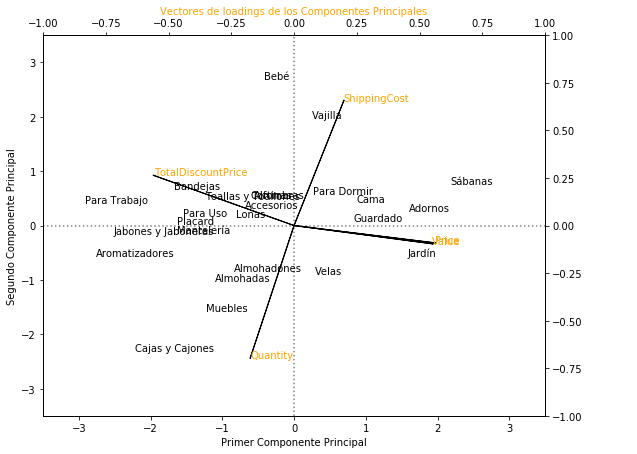

In [37]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Ploteamos a los Estados en el espacio de los Componentes Principales 1 y 2
for i in df_linea_pca.index:
    ax1.annotate(i, (df_linea_pca.PC1.loc[i], df_linea_pca.PC2.loc[i]), ha='center')

# Ploteamos las líneas de referencia
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Creamos ejes secundarios
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

# Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i], pca_loadings.PC2.loc[i]), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], pca_loadings.PC2[3])
ax2.arrow(0,0,pca_loadings.PC1[4], pca_loadings.PC2[4]);

In [38]:
# Vemos la varianza explicada de cada componente principal como atributo del modelo.

pca_linea.explained_variance_

array([2.78005093, 1.14455933, 0.83807232, 0.28315954, 0.14646557])

In [39]:
# Vemos el ratio la varianza explicada de cada componente principal como atributo del modelo.

pca_linea.explained_variance_ratio_

array([0.53541722, 0.22043365, 0.16140652, 0.05453443, 0.02820818])

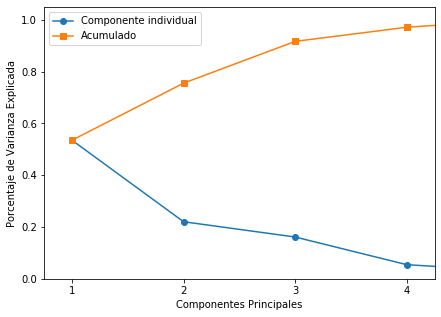

In [40]:
# Ploteamos como incrementa el % de varianza explicada a medida que agregamos componentes:

plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5], pca_linea.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4,5], np.cumsum(pca_linea.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

Text(0.5, 1, 'Correlacion entre features')

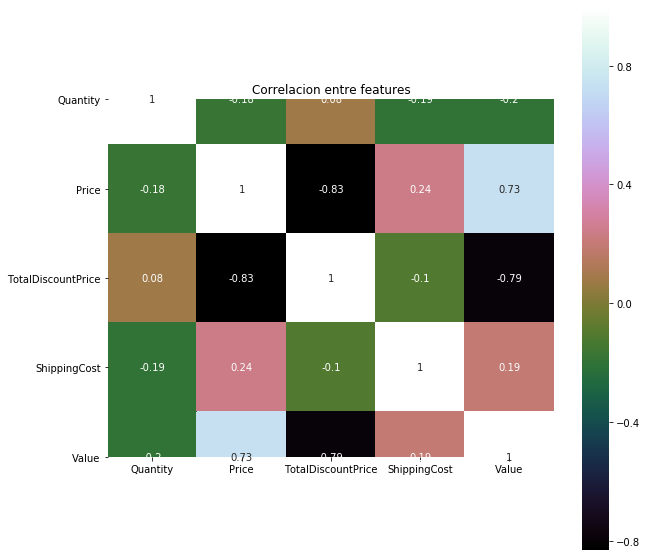

In [41]:
correlation = df_tabla.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlacion entre features')

In [42]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html
# If rowvar is True (default), then each row represents a variable, with observations in the columns. 
covarianzas = np.cov(df_linea_std, rowvar = False)
#display(covarianzas)

#otra forma de calcular la matriz de covarianzas:
mean_vec = np.mean(df_linea_std, axis=0)
cov_mat = (df_linea_std - mean_vec).T.dot((df_linea_std - mean_vec)) / (df_linea_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

In [43]:
# Descomposición en autovectores y autovalores:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.17406529  0.69488682 -0.69063103 -0.08424639  0.05258243]
 [ 0.56200375  0.09105012 -0.02988755 -0.54749076 -0.61255388]
 [-0.55798421 -0.26302612 -0.01881423 -0.77398315  0.14165801]
 [ 0.19807693 -0.65605458 -0.72045037  0.10270955  0.02756672]
 [ 0.55070157  0.09618644  0.05227619 -0.28906269  0.7753618 ]]

Eigenvalues 
[2.78005093 1.14455933 0.83807232 0.14646557 0.28315954]


In [44]:
# Ordeno los autovalores de mayor a menor:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#eig_pairs
# Sort the (eigenvalue, eigenvector) tuples from high to low
#ordeno por el primer elemento de cada tupla: el autovalor
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.780050929090515
1.1445593309074376
0.8380723221485202
0.28315953882801176
0.14646557133321167


In [45]:
# Varianza explicada:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(tot)
print(var_exp)

5.192307692307697
[53.54172159729875, 22.043364891550628, 16.14065213026778, 5.453442970020962, 2.8208184108618517]


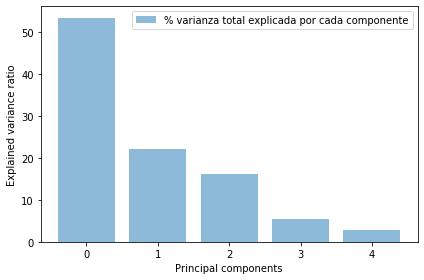

In [46]:
plt.bar(range(5), var_exp, alpha=0.5, align='center', label='% varianza total explicada por cada componente')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Me quedo con 2 componentes, en el mejor de los casos agrego al tercero

## Ahora analizare por productos e ire solo por 3 componentes de PCA

In [47]:
df_typo = df[{'OrderId', 'OrderDate', 'ProductId', 'ProductLine', 'ProductType', 'Name', 'Quantity', 'Price', 'ListPrice', \
              'RawItemDiscount', 'GrossItemAmountDiscount', 'TotalOrderGross', 'TotalDiscountPrice', \
              'ShippingCost', 'Value'}]

In [48]:
df_typo.shape

(452056, 15)

In [49]:
df_not_nulls = df_typo.dropna()

In [50]:
df_not_nulls.shape

(452056, 15)

In [51]:
df_not_nulls.columns 

Index(['ShippingCost', 'GrossItemAmountDiscount', 'ProductType', 'ListPrice',
       'TotalDiscountPrice', 'Value', 'ProductLine', 'Name', 'OrderId',
       'TotalOrderGross', 'Quantity', 'Price', 'RawItemDiscount', 'OrderDate',
       'ProductId'],
      dtype='object')

In [52]:
# Me ocupo de menos columnas porque vi por el grafico que estan corelacionadas 
columns_numeric = ['Quantity', 'Price', 'TotalDiscountPrice', 'ShippingCost', 'Value']
df_not_nulls_numeric = df_not_nulls[columns_numeric]
df_not_nulls_numeric.shape

(452056, 5)

In [53]:
df_not_nulls_numeric.head()

,Quantity,Price,TotalDiscountPrice,ShippingCost,Value
0,1,699.0,-1168.8,349.0,3076.2
1,1,699.0,-1168.8,349.0,3076.2
2,1,1199.0,-1168.8,349.0,3076.2
3,1,1299.0,-1168.8,349.0,3076.2
4,1,1399.0,-1399.0,299.0,1698.0


## Estandarizo

In [54]:
from sklearn.preprocessing import StandardScaler
# Instanciamos la clase, creando el objeto StdSclr.
StdSclr = StandardScaler()
# este objeto es el que voy a usar para escalar las observaciones nuevas, sin tener que recalcular las medias y desvios:
stdSclr_fit = StdSclr.fit(df_not_nulls_numeric)
df_std = pd.DataFrame(stdSclr_fit.transform(df_not_nulls_numeric), index=df_not_nulls_numeric.index, columns=df_not_nulls_numeric.columns)
df_std.head()

C:\Users\hmarq\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,Quantity,Price,TotalDiscountPrice,ShippingCost,Value
0,-0.319018,-0.678807,0.394873,3.285104,0.302890
1,-0.319018,-0.678807,0.394873,3.285104,0.302890
2,-0.319018,-0.221929,0.394873,3.285104,0.302890
3,-0.319018,-0.130554,0.394873,3.285104,0.302890
4,-0.319018,-0.039179,0.260087,2.764012,-0.324598


In [55]:
stdSclr_fit.transform(df_not_nulls_numeric)

C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.31901818, -0.67880666,  0.39487329,  3.28510408,  0.30289033],
       [-0.31901818, -0.67880666,  0.39487329,  3.28510408,  0.30289033],
       [-0.31901818, -0.22192944,  0.39487329,  3.28510408,  0.30289033],
       ...,
       [-0.31901818, -0.03917855, -0.39744805, -0.35211932,  0.05056554],
       [-0.31901818, -0.99862072, -0.39744805, -0.35211932,  0.05056554],
       [-0.31901818, -0.03917855, -0.39744805, -0.35211932,  0.05056554]])

## PCA

In [56]:
from sklearn.decomposition import PCA

# Instanciamos la clase PCA, especificamos en 3 el número de componentes, por lo visto arriba
pca_df = PCA(n_components= 3)

# Calculamos los componentes principales con el método fit()
pca_df_fit = pca_df.fit(df_std)

print(pca_df.components_)

[[ 0.03847386  0.43799723 -0.64000456 -0.04898438  0.62822996]
 [ 0.84128867 -0.49685068 -0.12662033 -0.05731368  0.16141627]
 [ 0.08529809  0.04251543 -0.01341989  0.99493379  0.02904038]]


## Contribuciones de cada componenete principal a la varianza total

In [57]:
pca_df_fit.explained_variance_ratio_

array([0.393523  , 0.23158985, 0.19979586])

In [58]:
df_pca = pd.DataFrame(pca_df_fit.transform(df_std), 
                      columns=['PC1', 'PC2', 'PC3'], index=df_std.index)
df_pca.head()

,PC1,PC2,PC3
0,-0.532944,-0.120510,3.215887
1,-0.532944,-0.120510,3.215887
2,-0.332833,-0.347510,3.235311
3,-0.292811,-0.392910,3.239196
4,-0.535207,-0.492664,2.708215


In [59]:
pca_loadings = pd.DataFrame(pca_df.components_.T, index=df_std.columns,\
                            columns=['PC1', 'PC2', 'PC3'])
# print(pca_df.components_)
display(pca_loadings)

,PC1,PC2,PC3
Quantity,0.038474,0.841289,0.085298
Price,0.437997,-0.496851,0.042515
TotalDiscountPrice,-0.640005,-0.126620,-0.013420
ShippingCost,-0.048984,-0.057314,0.994934
Value,0.628230,0.161416,0.029040


## Biplot

In [60]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Verdana',
        'size'   : 22}

matplotlib.rc('font', **font)

def plot_biplot(df_pca, pca_loadings):
    
    fig , ax1 = plt.subplots(figsize=(30,30))
    
    ax1.set_xlim(-5,15)
    ax1.set_ylim(-5,10)

    # Ploteamos a las propiedades en el espacio de los Componentes Principales 1 y 2
    for i in df_pca.index:
        # si viene un color lo uso, sino uso azul: 
        # (uso all porque estoy pidiendo que el array tenga todos los valores no nulos, sirve tambien any)
        if df_pca.color.loc[i].all():
            label = str(i) + "-" + df_pca.places.loc[i]
            ax1.annotate(label, (df_pca.PC1.loc[i], df_pca.PC2.loc[i]), ha='center', color=df_pca.color.loc[i]).\
            set_fontsize(22)
        else:
            ax1.annotate(i, (df_pca.PC1.loc[i], df_pca.PC2.loc[i]), ha='center', color='blue').set_fontsize(22)

    # Ploteamos las líneas de referencia
    ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('Primer Componente Principal')
    ax1.set_ylabel('Segundo Componente Principal')

    # Creamos ejes secundarios
    ax2 = ax1.twinx().twiny() 

    ax2.set_xlim(-5,15)
    ax2.set_ylim(-5,10)
    ax2.tick_params(axis='y', colors='orange')
    ax2.set_xlabel('Vectores de loadings de los Componentes Principales', color='orange')

    view_scale_factor = 15
    
    # Ploteamos a las variables originales en relación a los Componentes Principales 1 y 2
    for i in pca_loadings[['PC1', 'PC2']].index:
        ax2.annotate(i, (view_scale_factor * pca_loadings.PC1.loc[i], view_scale_factor * pca_loadings.PC2.loc[i]), \
                     color='orange')

    # Plot vectors
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[0], view_scale_factor*pca_loadings.PC2[0], transform = ax2.transData)
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[1], view_scale_factor*pca_loadings.PC2[1], transform = ax2.transData)
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[2], view_scale_factor*pca_loadings.PC2[2], transform = ax2.transData)
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[3], view_scale_factor*pca_loadings.PC2[3], transform = ax2.transData);
    ax2.arrow(0,0,view_scale_factor*pca_loadings.PC1[4], view_scale_factor*pca_loadings.PC2[4], transform = ax2.transData);   

## Armo la paleta de colores para Lineas de Producto

In [61]:
# construyo un diccionario que mapea ProductLine con un color
df_ProductLine = df.ProductLine[df_std.index]
ProductLine_unique = df_ProductLine.unique()
# pido un color para cada ProductLine distinto

ProductLine_color = plt.cm.tab20c(range(len(ProductLine_unique)))

#asocio ProductLine con color
color_for_ProductLine = dict(zip(ProductLine_unique, ProductLine_color))
color_for_ProductLine

# dada una fila de df_pca devuelve el color con que hay que representarla en el espacio de componentes principales
def get_color(row, df, color_for_ProductLine):
    #print(row.name)
    ProductLine = df.loc[row.name, "ProductLine"]
    result = color_for_ProductLine[ProductLine]
    return result
    
# agrego a df_pca el el color que le corresponde al ProductLine:
colors = df_pca.apply(lambda x: get_color(x, df, color_for_ProductLine) , axis=1)
#print(colors)
df_pca['color'] = colors


# agrego ProductLine a df_pca
# x.name es el indice del registro en el dataframe original
places = df_pca.apply(lambda x: df_not_nulls.loc[x.name, "ProductLine"], axis = 1)
df_pca['places'] = places

In [62]:
df_pca.head()

,PC1,PC2,PC3,color,places
0,-0.532944,-0.120510,3.215887,"[0.19215686274509805, 0.5098039215686274, 0.74...",Baño
1,-0.532944,-0.120510,3.215887,"[0.19215686274509805, 0.5098039215686274, 0.74...",Baño
2,-0.332833,-0.347510,3.235311,"[0.4196078431372549, 0.6823529411764706, 0.839...",Dormitorio
3,-0.292811,-0.392910,3.239196,"[0.4196078431372549, 0.6823529411764706, 0.839...",Dormitorio
4,-0.535207,-0.492664,2.708215,"[0.4196078431372549, 0.6823529411764706, 0.839...",Dormitorio


## Agrego las referencias de color

In [63]:
# df_pca tiene las coordenadas de cada registro en el espacio de las componentes principales
# pca_loadings tiene las coordenadas de cada variable original en el espacio de las componentes principales

plot_biplot(df_pca, pca_loadings)


## Armo la paleta de colores para Tipos de Producto

In [64]:
df_pca_Type = df_pca

In [65]:
# construyo un diccionario que mapea ProductType con un color
df_ProductType = df.ProductType[df_std.index]
ProductType_unique = df_ProductType.unique()
# pido un color para cada ProductType distinto

ProductType_color = plt.cm.tab20c(range(len(ProductType_unique)))

#asocio ProductType con color
color_for_ProductType = dict(zip(ProductType_unique, ProductType_color))
color_for_ProductType

# dada una fila de df_pca_Type devuelve el color con que hay que representarla en el espacio de componentes principales
def get_color(row, df, color_for_ProductType):
    #print(row.name)
    ProductType = df.loc[row.name, "ProductType"]
    result = color_for_ProductType[ProductType]
    return result
    
# agrego a df_pca_Type el el color que le corresponde al ProductType:
colors = df_pca_Type.apply(lambda x: get_color(x, df, color_for_ProductType) , axis=1)
#print(colors)
df_pca_Type['color'] = colors


# agrego ProductType a df_pca_Type
# x.name es el indice del registro en el dataframe original
places = df_pca_Type.apply(lambda x: df_not_nulls.loc[x.name, "ProductType"], axis = 1)
df_pca_Type['places'] = places

In [66]:
df_pca_Type.head()

,PC1,PC2,PC3,color,places
0,-0.532944,-0.120510,3.215887,"[0.19215686274509805, 0.5098039215686274, 0.74...",Toallas y Toallones
1,-0.532944,-0.120510,3.215887,"[0.19215686274509805, 0.5098039215686274, 0.74...",Toallas y Toallones
2,-0.332833,-0.347510,3.235311,"[0.4196078431372549, 0.6823529411764706, 0.839...",Sábanas
3,-0.292811,-0.392910,3.239196,"[0.4196078431372549, 0.6823529411764706, 0.839...",Sábanas
4,-0.535207,-0.492664,2.708215,"[0.4196078431372549, 0.6823529411764706, 0.839...",Sábanas


## Agrego las referencias de color

In [67]:
# df_pca_Type tiene las coordenadas de cada registro en el espacio de las componentes principales
# pca_loadings tiene las coordenadas de cada variable original en el espacio de las componentes principales

plot_biplot(df_pca_Type, pca_loadings)
